<h2>About this Project</h2>

<p>In this project, you will implement a simple multilayer perceptron for a regression problem.</p>

<h3>Evaluation</h3>

<p><strong>This project must be successfully completed and submitted in order to receive credit for this course. Your score on this project will be included in your final grade calculation.</strong><p>
    
<p>You are expected to write code where you see <em># YOUR CODE HERE</em> within the cells of this notebook. Not all cells will be graded; code input cells followed by cells marked with <em>#Autograder test cell</em> will be graded. Upon submitting your work, the code you write at these designated positions will be assessed using an "autograder" that will run all test cells to assess your code. You will receive feedback from the autograder that will identify any errors in your code. Use this feedback to improve your code if you need to resubmit. Be sure not to change the names of any provided functions, classes, or variables within the existing code cells, as this will interfere with the autograder. Also, remember to execute all code cells sequentially, not just those you’ve edited, to ensure your code runs properly.</p>
    
<p>You can resubmit your work as many times as necessary before the submission deadline. If you experience difficulty or have questions about this exercise, use the Q&A discussion board to engage with your peers or seek assistance from the instructor.<p>

<p>Before starting your work, please review <a href="https://s3.amazonaws.com/ecornell/global/eCornellPlagiarismPolicy.pdf">eCornell's policy regarding plagiarism</a> (the presentation of someone else's work as your own without source credit).</p>

<h3>Submit Code for Autograder Feedback</h3>

<p>Once you have completed your work on this notebook, you will submit your code for autograder review. Follow these steps:</p>

<ol>
  <li><strong>Save your notebook.</strong></li>
  <li><strong>Mark as Completed —</strong> In the blue menu bar along the top of this code exercise window, you’ll see a menu item called <strong>Education</strong>. In the <strong>Education</strong> menu, click <strong>Mark as Completed</strong> to submit your code for autograder/instructor review. This process will take a moment and a progress bar will show you the status of your submission.</li>
	<li><strong>Review your results —</strong> Once your work is marked as complete, the results of the autograder will automatically be presented in a new tab within the code exercise window. You can click on the assessment name in this feedback window to see more details regarding specific feedback/errors in your code submission.</li>
  <li><strong>Repeat, if necessary —</strong> The Jupyter notebook will always remain accessible in the first tabbed window of the exercise. To reattempt the work, you will first need to click <strong>Mark as Uncompleted</strong> in the <strong>Education</strong> menu and then proceed to make edits to the notebook. Once you are ready to resubmit, follow steps one through three. You can repeat this procedure as many times as necessary.</li>
    
<p>You can also download a copy of this notebook in multiple formats using the <strong>Download as</strong> option in the <strong>File</strong> menu above.</p>

<h2>Getting Started</h2>
<h3>Python Initialization</h3> 

Please run the following code to initialize your Python kernel. You should be running a version of Python 3.x. </p>

In [1]:
%load_ext autoreload

In [2]:
%autoreload 2
import numpy as np
from numpy.matlib import repmat
import sys
import matplotlib.pyplot as plt
from scipy.io import loadmat
import time

from helper import *

%matplotlib notebook
print('You\'re running python %s' % sys.version.split(' ')[0])

You're running python 3.6.8


<h3>Visualizing Data</h3>
<p>In the cell below, you generate a simple 1-dimensional toy dataset by calling <code>generate_data</code>. This function returns the data $\mathbf{X}$ and label $\mathbf{y}$. Note that $X$ is of shape (N, 2). We append 1 to each example to introduce bias.</p>

In [3]:
X, y = generate_data()

print(f'The shape of X is {X.shape}. This is because we append 1 to each feature vector to introduce bias!')

The shape of X is (50, 2). This is because we append 1 to each feature vector to introduce bias!


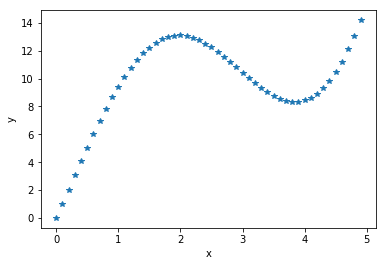

In [4]:
plt.plot(X[:, 0], y, '*')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

<h2>Multilayer Perceptron</h2>

<h3>Part Zero: Transition Function and Transition Function's gradient</h3>
<p>Transition functions are the key component of a neural network that contributes to its nonlinearity. For our neural network, we are going to use the ReLU transition function. Recall that the ReLU transition is as follows:</p>
$$\sigma(z) = \max(z, 0)$$

<p>We have implemented the <code>ReLU</code> and <code>ReLU_grad</code> functions as follow: (As its name suggests,  <code>ReLU_grad</code> computes the gradient of the ReLU function.)</p>

In [5]:
def ReLU(z):
    return np.maximum(z, 0)

In [6]:
def ReLU_grad(z):
    return (z > 0).astype('float64')

<h4>Visualize the Activation Function</h4>
We can now visualize the activation function in the plot above by running the code in the cell below.

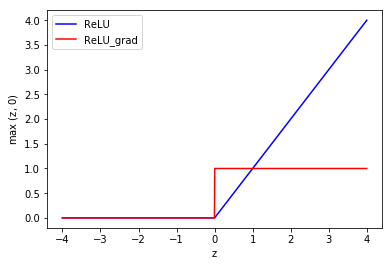

In [7]:
plt.plot(np.linspace(-4, 4, 1000), ReLU(np.linspace(-4, 4, 1000)),'b-')
plt.plot(np.linspace(-4, 4, 1000), ReLU_grad(np.linspace(-4, 4, 1000)),'r-')
plt.xlabel('z')
plt.ylabel(r'$\max$ (z, 0)')
plt.legend(['ReLU','ReLU_grad'])

We can also display the function and its gradient on a small example vector:

In [8]:
x=np.array([2.7,-0.5,-3.2])
print("X:",x)
print("ReLU(X):",ReLU(x))
print("ReLU_grad(X):",ReLU_grad(x))

X: [ 2.7 -0.5 -3.2]
ReLU(X): [2.7 0.  0. ]
ReLU_grad(X): [1. 0. 0.]


<h3>Part One: Forward Pass [Graded]</h3>

In this section, you will implement the forward pass function <code>forward_pass(W, xTr)</code>. Note that $\mathbf{W}$ specifies the weights of the network at each layer. More specifically, $W[0]$ stores the weights for the first layer of the network, $W[i]$ stores the weights of the (i + 1)-th layer and $W[l-1]$ stores the weights of the last layer.

Each layer of the network produces two outputs, $A[i + 1]$ and 
$Z[i + 1]$, where 

$$A[i + 1]=Z[i] * W[i]$$ 
for $i = 0, 1, 2, ..., l-1$ and 
$$Z[i+1]=\sigma(A[i+1])$$ for $i = 0, 1, 2, ..., l-2$ and 
$$Z[l-1]=A[l-1]$$


Here, $*$ stands for matrix multiplication and $Z[0], A[0]$ are both initialized to be the the training set.

For simplicity, we did not include bias when calculating $A[i + 1]$. For the purpose of this assignment, this is fine since we have appended one in all the raw features and  our dataset is rather simple. In general, bias should always be included when calculating $A[i + 1]$

To visualize the variables `A`, `Z`, and `W` a bit better, consider the following hypothetical neural net layer:
![nnlayer.png](nnlayer.png)

It is important to note that `W[i]` is an *array of matrices*, as specified in the docstring for the provided method `initweights`. Since layer `i` has 2 nodes and layer `i+1` has 3, `W[i]` is a 2 by 3 matrix.

Additionally, $\sigma$ is applied elementwise to the values in `A[i+1]`, and is `ReLU` for this assignment. The final output at the end of the neural network should be `Z[l]`.

The following function will allow you to randomly generate initial weights for the neural network:

In [9]:
def initweights(specs):
    """
    Given a specification of the neural network, output a random weight array
    INPUT:
        specs - array of length m+1. specs[0] should be the dimension of the feature and spec[-1] 
                should be the dimension of output
    
    OUTPUT:
        W - array of length m, each element is a matrix
            where size(weights[i]) = (specs[i], specs[i+1])
    """
    W = []
    for i in range(len(specs) - 1):
        W.append(np.random.randn(specs[i], specs[i+1]))
    return W

In [10]:
# If we want to create a network that 
#   i) takes in feature of dimension 2
#   ii) has 1 hidden layer with 3 hidden units
#   iii) output a scalar
# then we initialize the the weights the following way:

W = initweights([2, 3, 1])

In the cell below, implement the forward pass function <code>forward_pass(W, xTr)</code>. The below is the pseudocode from the READ module: 

![fwdpass.png](fwdpass.png)

<h3>Important</h3>
A forward pass is used to evaluate a neural network on an input. However, here, we want to do a forward pass also to train a neural network, i.e. we will follow it with a backward pass. Therefore, unlike the pseudocode from the READ module, our code requires two changes. We output `A` (a <b>list</b> of the outputs at each layer after multiplying by the weights) and `Z` (a <b>list</b> of all outputs at each layer after passing the results of `A` through our transition function). To be precise, the outputs to your function should be $A=[a_1,a_2,\dots,a_L]$ and $Z=[z_1,z_2,\dots,z_L]$. The reason we need these intermediate results is that it is much more efficient to not recompute them when we use them during the back-prop pass. 

In [11]:
def forward_pass(W, xTr):
    """
    function forward_pass(weights,xTr)
    
    INPUT:
    W - an array of L weight matrices
    xTr - nxd matrix. Each row is an input vector
    
    OUTPUTS:
    A - a list of matrices (of length L) that stores result of matrix multiplication at each layer 
    Z - a list of matrices (of length L) that stores result of transition function at each layer 
    """
    
    # Initialize A and Z
    A = [xTr]
    Z = [xTr]
    for w in W:
        A.append(Z[-1]@w)
        Z.append(ReLU(A[-1]))
    Z[-1] = A[-1]
    return A, Z

In [12]:
def forward_test1():
    X, _ = generate_data() # generate data
    W = initweights([2, 3, 1]) # generate random weights
    out = forward_pass(W, X) # run forward pass
    return len(out) == 2 # make sure that your function return a tuple

def forward_test2():
    X, _ = generate_data() # generate data
    W = initweights([2, 3, 1]) # generate random weights
    A, Z = forward_pass(W, X) # run forward pass
    return len(A) == 3 and len(Z) == 3 # Make sure that output produced match the length of the weight

def forward_test3():
    X, _ = generate_data() # generate data
    n, _ = X.shape
    W = initweights([2, 3, 1]) # generate random weights
    A, Z = forward_pass(W, X) # run forward pass
    return (A[1].shape == (n, 3) and 
            Z[1].shape == (n, 3)  and
            A[2].shape == (n, 1) and
            A[2].shape == (n, 1) ) # Make sure the layer produce the right shape output

def forward_test4():
    X = -1*np.ones((1, 2)) # generate a feature matrix of all negative ones
    W = [np.ones((2, 1))] # a single layer network with weights one
    A, Z = forward_pass(W, X) # run forward pass
    
    # check whether you do not apply the transition function to A[-1] 
    return np.linalg.norm(Z[-1] - X@W[0]) < 1e-7

def forward_test5():
    X, _ = generate_data() # generate data
    n, _ = X.shape
    W = initweights([2, 3, 1]) # generate random weights
    A, Z = forward_pass(W, X) # run your forward pass
    A_grader, Z_grader = forward_pass_grader(W, X) # run our forward pass
    
    Adiff = 0
    Zdiff = 0
    
    # compute the difference between your solution and ours
    for i in range(1, 3):
        Adiff += np.linalg.norm(A[i] - A_grader[i])
        Zdiff += np.linalg.norm(Z[i] - Z_grader[i])
        
    return Adiff < 1e-7 and Zdiff < 1e-7

runtest(forward_test1, "forward_test1")
runtest(forward_test2, "forward_test2")
runtest(forward_test3, "forward_test3")
runtest(forward_test4, "forward_test4")
runtest(forward_test5, "forward_test5")

Running Test: forward_test1 ... ✔ Passed!
Running Test: forward_test2 ... ✔ Passed!
Running Test: forward_test3 ... ✔ Passed!
Running Test: forward_test4 ... ✔ Passed!
Running Test: forward_test5 ... ✔ Passed!


In [13]:
# Autograder Test Cell
# Forward_test1


In [14]:
# Autograder Test Cell
# Forward_test2


In [15]:
# Autograder Test Cell
# Forward_test3


In [16]:
# Autograder Test Cell
# Forward_test4


In [17]:
# Autograder Test Cell
# Forward_test5


<h3>Part Two: MSE Loss and Gradient</h3>
<h4>Loss Function [Graded]</h4>

In this section, you are going to implement the Mean Squared Error (MSE) loss function for regression. Recall that for a set of training example $\{(\mathbf{x}_1, y_1), ..., (\mathbf{x}_n, y_n)\}$, the MSE of the network $h$ is 

$$L = \frac{1}{n} \sum_{i = 1} ^n(h(\mathbf{x}_i) - y_i)^2$$

The <code>MSE</code> function you are going to implement takes the output of the network (<code>out</code>) and the training labels (<code>y</code>) and computes the MSE loss. You will also need to implement the <code>MSE_grad</code> function that will calculate the gradient of the MSE loss with respect to each entry of `out`. This function will be useful when you implement backpropagation.

In [18]:
def MSE(out, y):
    """
    INPUT:
    out: output of network (n vector)
    y: training labels (n vector)
    
    OUTPUTS:
    
    loss: the mse loss (a scalar)
    """
    
    n = len(y)
    loss = np.sum(np.square(out - y))/n

    return loss

In [19]:
def MSE_test1():
    X, y = generate_data() # generate data
    W = initweights([2, 3, 1]) # generate random weights
    A, Z = forward_pass(W, X)
    loss = MSE(Z[-1].flatten(), y) # calculate loss
    
    return np.isscalar(loss) # your loss should be a scalar

def MSE_test2():
    X, y = generate_data() # generate data
    W = initweights([2, 3, 1]) # generate random weights
    A, Z = forward_pass(W, X)
    loss = MSE(Z[-1].flatten(), y) # calculate loss
    
    return loss >= 0 # your loss should be nonnegative

def MSE_test3():
    X, y = generate_data() # generate data
    W = initweights([2, 3, 1]) # generate random weights
    A, Z = forward_pass(W, X)
    loss = MSE(Z[-1].flatten(), y) # calculate loss
    loss_grader = MSE_grader(Z[-1].flatten(), y)
    
    # your loss should not deviate too much from ours
    # If you fail this test case, check whether you divide your loss by 1/n
    return np.absolute(loss - loss_grader) < 1e-7 

runtest(MSE_test1, "MSE_test1")
runtest(MSE_test2, "MSE_test2")
runtest(MSE_test3, "MSE_test3")

Running Test: MSE_test1 ... ✔ Passed!
Running Test: MSE_test2 ... ✔ Passed!
Running Test: MSE_test3 ... ✔ Passed!


In [20]:
# Autograder Test Cell
# MSE_test1


In [21]:
# Autograder Test Cell
# MSE_test2


In [22]:
# Autograder Test Cell
# MSE_test3


#### Gradient [Graded]

You will now need to implement the gradient of the MSE loss calculated above. When you take the derivative of the above with respect to the entries of out, you get the following:
$$\nabla L = \frac{2}{n} * (h(\mathbf{x}_i) - y_i)$$

Implement the above in the function `MSE_grad`.

In [23]:
def MSE_grad(out, y):
    """
    INPUT:
    out: output of network (n vector)
    y: training labels (n vector)
    
    OUTPUTS:
    
    grad: the gradient of the MSE loss with respect to out (nx1 vector)
    """
    
    n = len(y)
    grad = 2*(out - y)/n

    return grad

In [24]:
def MSE_grad_test1():
    X, y = generate_data() # generate data
    
    n, _ = X.shape
    W = initweights([2, 3, 1]) # generate random weights
    A, Z = forward_pass(W, X)
    
    grad = MSE_grad(Z[-1].flatten(), y)
    return grad.shape == (n, ) # check if the gradient has the right shape

def MSE_grad_test2():
    out = np.array([1])
    y = np.array([1.2])
    
    # calculate numerical gradient using finite difference
    numerical_grad = (MSE(out + 1e-7, y) - MSE(out - 1e-7, y)) / 2e-7
    grad = MSE_grad(out, y)
    
    # check your gradient is close to the numerical gradient
    return np.linalg.norm(numerical_grad - grad) < 1e-7

def MSE_grad_test3():
    X, y = generate_data() # generate data
    
    n, _ = X.shape
    W = initweights([2, 3, 1]) # generate random weights
    A, Z = forward_pass(W, X)
    
    grad = MSE_grad(Z[-1].flatten(), y)
    grad_grader = MSE_grad_grader(Z[-1].flatten(), y) # compute gradient using our solution
    
    # your gradient should not deviate too much from ours
    return np.linalg.norm(grad_grader - grad) < 1e-7

runtest(MSE_grad_test1, 'MSE_grad_test1')
runtest(MSE_grad_test2, 'MSE_grad_test2')
runtest(MSE_grad_test3, 'MSE_grad_test3')

Running Test: MSE_grad_test1 ... ✔ Passed!
Running Test: MSE_grad_test2 ... ✔ Passed!
Running Test: MSE_grad_test3 ... ✔ Passed!


In [25]:
# Autograder Test Cell
# MSE_grad_test1


In [26]:
# Autograder Test Cell
# MSE_grad_test2


In [27]:
# Autograder Test Cell
# MSE_grad_test3


<h3> Part Three: Backpropagation [Graded]</h3>

In this section, you are going to implement the <code>backprop</code> for a ReLU network specified by the weight <code>W</code>. To recap, this is the stage that updates all the weights in the network starting from the last layer. 

Again, our implementation will have slight tweaks from the one in the READ module on back propagation. 
* Recall that in backpropagation, we alternate between calculating a "link" ( $\frac{\partial \mathcal L}{\partial \mathbf a_\ell}$) and updating the weight ($\mathbf W_\ell = \mathbf W_\ell -\alpha \frac{\partial \mathcal L}{\partial \mathbf W_\ell}$). In this function, you only calculate the update $\frac{\partial \mathcal L}{\partial \mathbf W_\ell}$, **without applying it**. In other words, you store all the $\frac{\partial \mathcal L}{\partial \mathbf W_\ell}$ for all $1 \le \ell \le L$, and return them all in the list `gradients`.
* We have absorbed $b$ into $\mathbf W$, so you don't need to calculate its gradient explicitly (thus, you should just ignore the second line in the for loop of the pseudocode!) 
* In our code `delta` = $\vec \delta _ \ell = \frac{\partial \mathcal L}{\partial \mathbf a_\ell}$. The line initializing it has been done for you, so you only need to implement the for loop from the pseudocode (copied below).

![backpass.png](backpass.png)

Hint: In python you can multiply two matrices <code>D,B</code> element-wise with <code>D*B</code>. 

In [28]:
def backprop(W, A, Z, y):
    """
    
    INPUT:
    W weights (cell array)
    A output of forward pass (cell array)
    Z output of forward pass (cell array)
    y vector of size n (each entry is a label)
    
    OUTPUTS:
    
    gradient = the gradient with respect to W as a cell array of matrices
    """
    
    # Convert delta to a row vector to make things easier
    delta = (MSE_grad(Z[-1].flatten(), y) * 1).reshape(-1, 1)

    # compute gradient with backprop
    gradients = []
    for z, a, w in zip(Z[-2::-1],A[-2::-1],W[::-1]):
        gradients.append(z.T@delta)
        delta = ReLU_grad(a)*(delta@w.T)
    gradients.reverse()
    return gradients

In [29]:
def backprop_test1():
    X, y = generate_data() # generate data
    
    n, _ = X.shape
    W = initweights([2, 3, 1]) # generate random weights
    A, Z = forward_pass(W, X)
    
    gradient = backprop(W, A, Z, y) # backprop to calculate the gradient
    
    # You should return a list with the same len as W
    return len(gradient) == len(W)

def backprop_test2():
    X, y = generate_data() # generate data
    
    n, _ = X.shape
    W = initweights([2, 3, 1]) # generate random weights
    A, Z = forward_pass(W, X)
    
    gradient = backprop(W, A, Z, y) # backprop to calculate the gradient
    
    # gradient[i] should match the shape of W[i]
    return np.all([gradient[i].shape == W[i].shape for i in range(len(W))])

def backprop_test3():
    X, y = generate_data() # generate data
    
    n, _ = X.shape
    
    # Use a one layer network
    # This is essentially the least squares
    W = initweights([2, 1]) 
    
    A, Z = forward_pass(W, X)
    
    # backprop to calculate the gradient
    gradient = backprop(W, A, Z, y) 
    
    # calculate the least square gradient
    least_square_gradient = 2 *((X.T @ X) @ W[0] - X.T @ y.reshape(-1, 1)) / n
    
    # gradient[0] should be the least square gradient
    return np.linalg.norm(gradient[0] - least_square_gradient) < 1e-7

def backprop_test4():
    X, y = generate_data() # generate data
    
    n, _ = X.shape
    
    # Use a one layer network
    # This is essentially the least squares
    W = initweights([2, 5, 5, 1]) 
    
    A, Z = forward_pass(W, X)
    
    # backprop to calculate the gradient
    gradient = backprop(W, A, Z, y) 
    
    # calculate the backprop gradient
    gradient_grader = backprop_grader(W, A, Z, y)
    
    # Check whether your gradient matches ours
    OK=[len(gradient_grader)==len(gradient)] # check if length matches
    for (g,gg) in zip(gradient_grader,gradient): # check if each component matches in shape and values
        OK.append(gg.shape==g.shape and (np.linalg.norm(g - gg) < 1e-7))
    return(all(OK))

def backprop_test5():
    # Here we reverse your gradient output and check that reverse with ours. It shouldn't match. 
    # If your reverse gradient matches our gradient, this means you outputted the gradient in reverse order.
    # This is a common mistake, as the loop is backwards. 
    X, y = generate_data() # generate data
    
    n, _ = X.shape
    
    # Use a one layer network
    # This is essentially the least squares
    W = initweights([2, 5, 5, 1]) 
    
    A, Z = forward_pass(W, X)
    
    # backprop to calculate the gradient
    gradient = backprop(W, A, Z, y) 
    
    # calculate the backprop gradient
    gradient_grader = backprop_grader(W, A, Z, y)

    gradient.reverse() # reverse the gradient. From now on it should NOT match
    # Check whether your gradient matches ours
    OK=[] # check if length matches
    for (g,gg) in zip(gradient_grader,gradient): # check if each component matches
        OK.append(gg.shape==g.shape and (np.linalg.norm(g - gg) < 1e-7))
    return(not all(OK)) 



runtest(backprop_test1, 'backprop_test1')
runtest(backprop_test2, 'backprop_test2')
runtest(backprop_test3, 'backprop_test3')
runtest(backprop_test4, 'backprop_test4')
runtest(backprop_test5, 'backprop_test5')

Running Test: backprop_test1 ... ✔ Passed!
Running Test: backprop_test2 ... ✔ Passed!
Running Test: backprop_test3 ... ✔ Passed!
Running Test: backprop_test4 ... ✔ Passed!
Running Test: backprop_test5 ... ✔ Passed!


In [30]:
# Autograder Test Cell
# backprop_test1


In [31]:
# Autograder Test Cell
# backprop_test2


In [32]:
# Autograder Test Cell
# backprop_test3


In [33]:
# Autograder Test Cell
# backprop_test4


In [34]:
# Autograder Test Cell
# backprop_test5


<h3> Part Four: Training with Gradient Descent</h3>

Run the cell below to train a ReLU Network for the task with Gradient Descent. Feel free to play around with the hyperparameters such learning rate, number of epochs, number of hidden layers, size of each hidden layers. 

Elapsed time: 5.88s


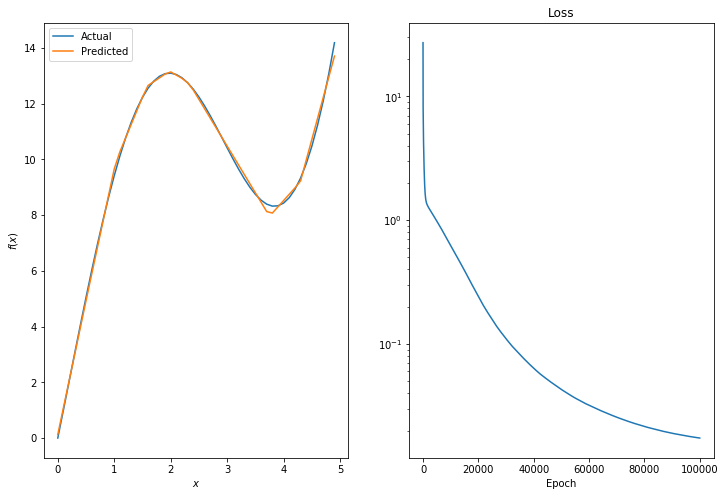

In [38]:
#generate data
X, y = generate_data() # generate data


# learning rate for Gradient Descent
lr = 0.001

# Number of epochs
# one epoch - one full pass through the dataset
M = 100000

# keep track of the losses
losses = np.zeros(M)
t0 = time.time()

# initialize a neural network with one hidden layer 
# Try varying the depth and width of the neural networks to see the effect

W = initweights([2, 20, 1])

# Start training
for i in range(M):
    
    # Do a forward pass
    A, Z = forward_pass(W, X)
    
    # Calculate the loss
    losses[i] = MSE(Z[-1].flatten(), y)
    
    # Calculate the loss using backprop
    gradients = backprop(W, A, Z, y)
    
    # Update he parameters
    for j in range(len(W)):
        W[j] -= lr * gradients[j]
t1 = time.time()
print('Elapsed time: %.2fs' % (t1-t0))
plot_results(X[:, 0], y, Z, losses)